# Stock Prediction: Predicting Stock Prices Based on News Headlines

## Introduction 

Daily News for Stock Market Prediction: Using 8 years daily news headlines to predict stock market movement

## The Clients

* Traders, trading companies, as well as most financial institutions. Even everyday people who invest in stocks would be able to derive some insights from this.
* Stock prices rising or dropping has a large effect on financial institutions, everyday people, and the economy as a whole.
* The media in the sense that they have the ability to alter/understand how their naming conventions affect stock prices


## The Data

## Data Wrangling


In [52]:
import numpy as np
import matplotlib.pyplot as plt
import datetime
import pandas as pd
import seaborn as sns
import scipy
from scipy.stats import chisquare
from scipy.stats import chi2_contingency


%matplotlib inline

### Stock Data

#### Dow Jones Industrial Average (DJIA) - Range: 2008-06-08 to 2016-07-01

In [62]:
filename='DJIA_table.csv'
djia = pd.read_csv(filename)
djia.head(5)

,Date,Open,High,Low,Close,Volume,Adj Close
0,2016-07-01,17924.240234,18002.380859,17916.910156,17949.369141,82160000,17949.369141
1,2016-06-30,17712.759766,17930.609375,17711.800781,17929.990234,133030000,17929.990234
2,2016-06-29,17456.019531,17704.509766,17456.019531,17694.679688,106380000,17694.679688
3,2016-06-28,17190.509766,17409.720703,17190.509766,17409.720703,112190000,17409.720703
4,2016-06-27,17355.210938,17355.210938,17063.080078,17140.240234,138740000,17140.240234


#### Convert date column to datetime

In [34]:
djia['Date'] = pd.to_datetime(djia['Date'])

#### Check for missing Data

In [37]:
djia.describe()

,Open,High,Low,Close,Volume,Adj Close
count,1989.000000,1989.000000,1989.000000,1989.000000,1.989000e+03,1989.000000
mean,13459.116048,13541.303173,13372.931728,13463.032255,1.628110e+08,13463.032255
std,3143.281634,3136.271725,3150.420934,3144.006996,9.392343e+07,3144.006996
min,6547.009766,6709.609863,6469.950195,6547.049805,8.410000e+06,6547.049805
25%,10907.339844,11000.980469,10824.759766,10913.379883,1.000000e+08,10913.379883
50%,13022.049805,13088.110352,12953.129883,13025.580078,1.351700e+08,13025.580078
75%,16477.699219,16550.070312,16392.769531,16478.410156,1.926000e+08,16478.410156
max,18315.060547,18351.359375,18272.560547,18312.390625,6.749200e+08,18312.390625


In [38]:
djia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1989 entries, 0 to 1988
Data columns (total 7 columns):
Date         1989 non-null datetime64[ns]
Open         1989 non-null float64
High         1989 non-null float64
Low          1989 non-null float64
Close        1989 non-null float64
Volume       1989 non-null int64
Adj Close    1989 non-null float64
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 108.9 KB


### News Data

#### Crawled historical news headlines from Reddit WorldNews Channel (/r/worldnews). They are ranked by reddit users' votes, and only the top 25 headlines are considered for a single date. (Range: 2008-06-08 to 2016-07-01)

In [61]:
## Display full dataframe information
pd.set_option('display.max_colwidth', -1)

filename_R='RedditNews.csv'
news = pd.read_csv(filename_R)
news.head(5)

,Date,News
0,2016-07-01,"A 117-year-old woman in Mexico City finally received her birth certificate, and died a few hours later. Trinidad Alvarez Lira had waited years for proof that she had been born in 1898."
1,2016-07-01,IMF chief backs Athens as permanent Olympic host
2,2016-07-01,"The president of France says if Brexit won, so can Donald Trump"
3,2016-07-01,British Man Who Must Give Police 24 Hours' Notice of Sex Threatens Hunger Strike: The man is the subject of a sexual risk order despite having never been convicted of a crime.
4,2016-07-01,100+ Nobel laureates urge Greenpeace to stop opposing GMOs


In [16]:
news.columns

Index(['Date', 'News'], dtype='object')

#### Check for missing values

In [17]:
news.describe()

,Date,News
count,73608,73608
unique,2943,73537
top,2008-10-26,b'Why Russias response to Georgia was right'
freq,50,3


In [18]:
news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73608 entries, 0 to 73607
Data columns (total 2 columns):
Date    73608 non-null object
News    73608 non-null object
dtypes: object(2)
memory usage: 1.1+ MB


### Combined Dataset (World News & DJIA)

In [68]:
## Display full dataframe information
pd.set_option('display.max_colwidth', -1)
filename_C='Combined_News_DJIA.csv'
combined = pd.read_csv(filename_C)

The Label variable will be a 1 if the DJIA stayed the same or rose on that date or 0 if the DJIA fell on that date.

In [69]:
combined.head(2)

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as countries move to brink of war""",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into South Ossetia; footage from fighting (YouTube)',"b'Russian tanks are moving towards the capital of South Ossetia, which has reportedly been completely destroyed by Georgian artillery fire'","b""Afghan children raped with 'impunity,' U.N. official says - this is sick, a three year old was raped and they do nothing""",b'150 Russian tanks have entered South Ossetia whilst Georgia shoots down two Russian jets.',"b""Breaking: Georgia invades South Ossetia, Russia warned it would intervene on SO's side""","b""The 'enemy combatent' trials are nothing but a sham: Salim Haman has been sentenced to 5 1/2 years, but will be kept longer anyway just because they feel like it.""",...,"b'Georgia Invades South Ossetia - if Russia gets involved, will NATO absorb Georgia and unleash a full scale war?'",b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to prevent an Israeli strike on Iran."" Israeli Defense Minister Ehud Barak: ""Israel is prepared for uncompromising victory in the case of military hostilities.""'",b'This is a busy day: The European Union has approved new sanctions against Iran in protest at its nuclear programme.',"b""Georgia will withdraw 1,000 soldiers from Iraq to help fight off Russian forces in Georgia's breakaway region of South Ossetia""",b'Why the Pentagon Thinks Attacking Iran is a Bad Idea - US News &amp; World Report',b'Caucasus in crisis: Georgia invades South Ossetia',"b'Indian shoe manufactory - And again in a series of ""you do not like your work?""'",b'Visitors Suffering from Mental Illnesses Banned from Olympics',"b""No Help for Mexico's Kidnapping Surge"""
1,2008-08-11,1,"b'Why wont America and Nato help us? If they wont help us now, why did we help them in Iraq?'",b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli training, we're fending off Russia """,b'Georgian army flees in disarray as Russians advance - Gori abandoned to Russia without a shot fired',"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zealand Passports doing in Iraq?',b'Russia angered by Israeli military sale to Georgia',b'An American citizen living in S.Ossetia blames U.S. and Georgian leaders for the genocide of innocent people',...,b'Israel and the US behind the Georgian aggression?',"b'""Do not believe TV, neither Russian nor Georgian. There are much more victims""'",b'Riots are still going on in Montreal (Canada) because police murdered a boy on Saturday.',b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Torture',b' Russia has just beaten the United States over the head with Peak Oil',b'Perhaps *the* question about the Georgia - Russia conflict ',b'Russia is so much better at war',"b""So this is what it's come to: trading sex for food."""


In [20]:
combined.columns

Index(['Date', 'Label', 'Top1', 'Top2', 'Top3', 'Top4', 'Top5', 'Top6', 'Top7',
       'Top8', 'Top9', 'Top10', 'Top11', 'Top12', 'Top13', 'Top14', 'Top15',
       'Top16', 'Top17', 'Top18', 'Top19', 'Top20', 'Top21', 'Top22', 'Top23',
       'Top24', 'Top25'],
      dtype='object')

#### Check for missing values

In [21]:
combined.describe()

,Label
count,1989.000000
mean,0.535445
std,0.498867
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [39]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1989 entries, 0 to 1988
Data columns (total 27 columns):
Date     1989 non-null object
Label    1989 non-null int64
Top1     1989 non-null object
Top2     1989 non-null object
Top3     1989 non-null object
Top4     1989 non-null object
Top5     1989 non-null object
Top6     1989 non-null object
Top7     1989 non-null object
Top8     1989 non-null object
Top9     1989 non-null object
Top10    1989 non-null object
Top11    1989 non-null object
Top12    1989 non-null object
Top13    1989 non-null object
Top14    1989 non-null object
Top15    1989 non-null object
Top16    1989 non-null object
Top17    1989 non-null object
Top18    1989 non-null object
Top19    1989 non-null object
Top20    1989 non-null object
Top21    1989 non-null object
Top22    1989 non-null object
Top23    1988 non-null object
Top24    1986 non-null object
Top25    1986 non-null object
dtypes: int64(1), object(26)
memory usage: 419.6+ KB


##  Data Visualization & Preliminary Data Analysis 

### Opening Prices

Text(0.5,1,'Open')

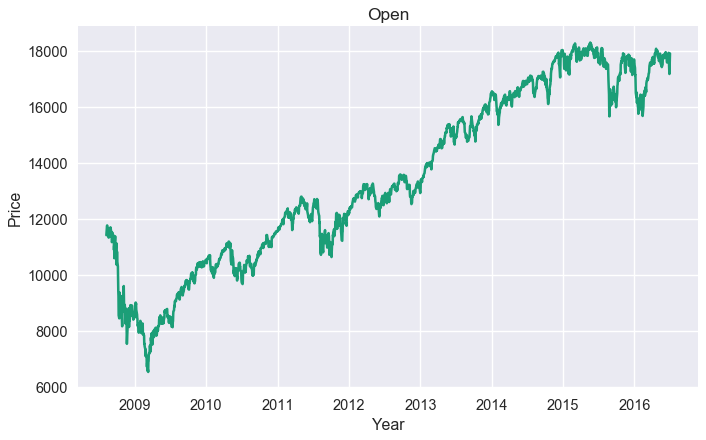

In [54]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
open = plt.plot(dija.Date, dija.Open)
plt.xlabel("Year")
plt.ylabel("Price")
plt.title("Open")

In [25]:
### DJIA has rallied since 2008 (The economy was in a recession at the time)

### Volume

Text(0.5,1,'Volume')

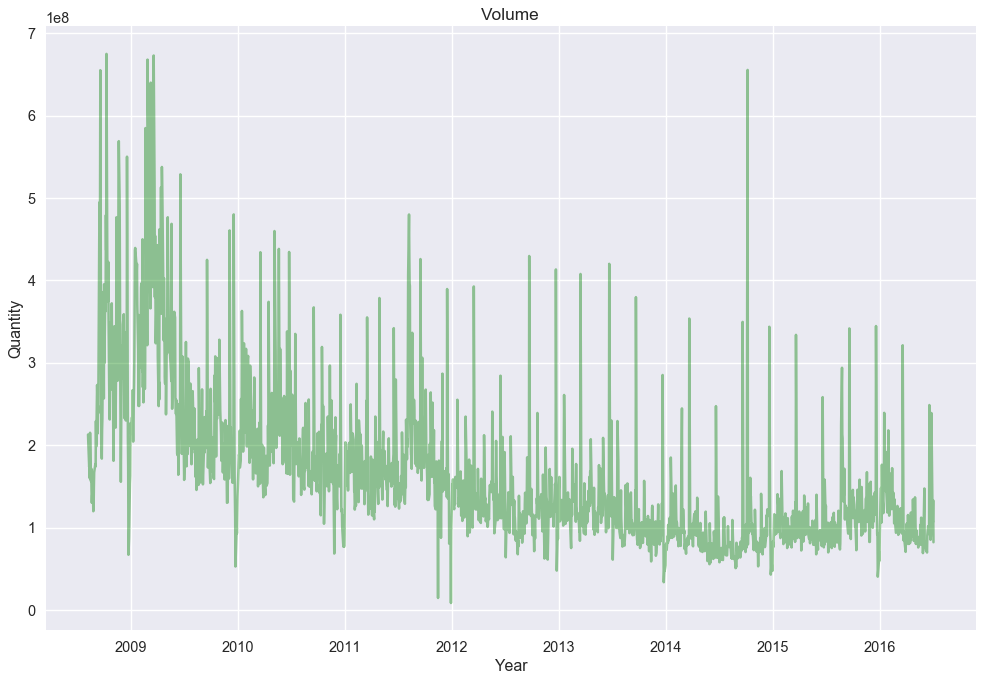

In [55]:
figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
open = plt.plot(dija.Date, dija.Volume, 'g', alpha = 0.4)
plt.xlabel("Year")
plt.ylabel("Quantity")
plt.title("Volume")


### Difference Between Opening & Closing Price

Text(0.5,1,'Difference between Opening and Closing Price')

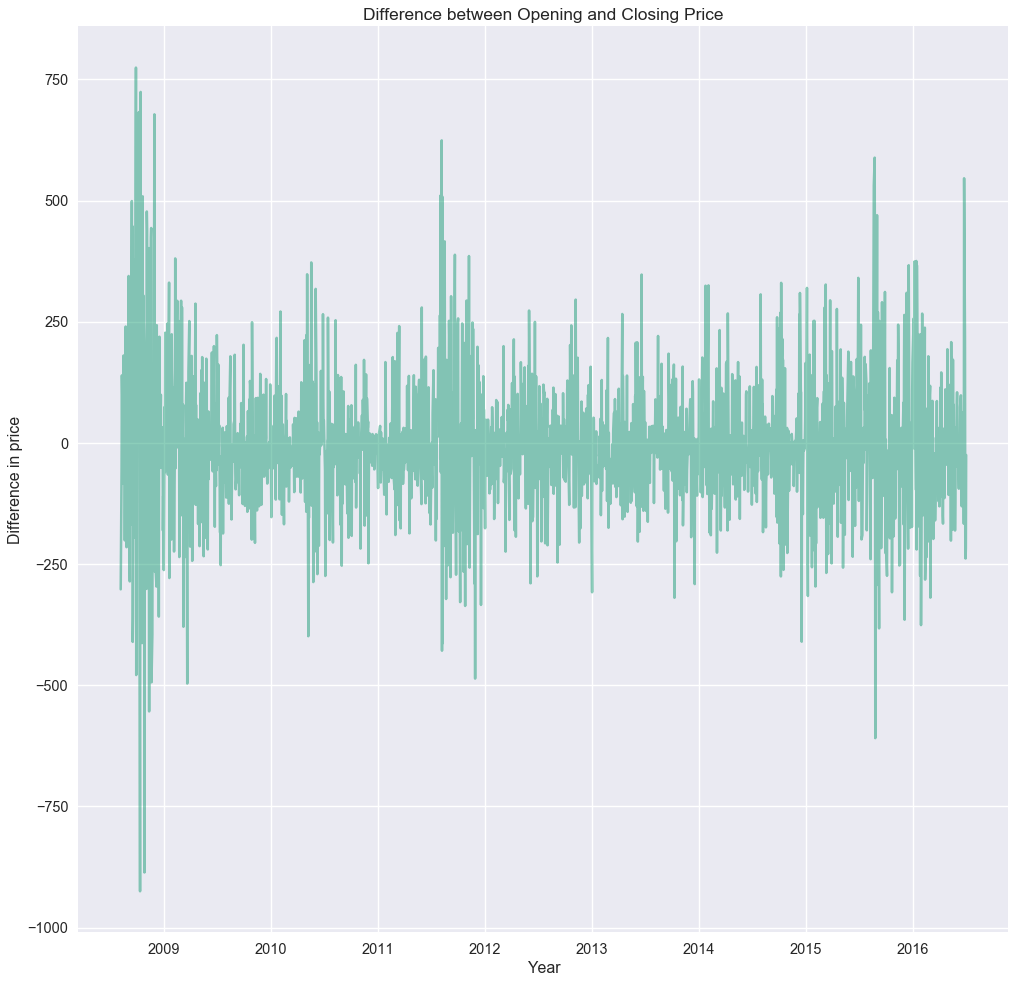

In [46]:
figure(num=None, figsize=(15, 15), dpi=80, facecolor='w', edgecolor='k')
diff_open_close = (dija.Open-dija.Close)
plt.plot( dija.Date, diff_open_close, alpha = 0.5)
plt.xlabel("Year")
plt.ylabel("Difference in price")
plt.title("Difference between Opening and Closing Price")


In [28]:
## Every 4 years we can that the markets are very volitile (2008,2012,2016), 2008 was the most volitle (Economy)

### Interactive Candlestick Chart 

A candlestick chart is a style of financial chart used to describe price movements of a security, derivative, or currency. Each "candlestick" typically shows one day and is the combination of a line-chart and bar-chart: each bar represents all four important pieces of information for that day: The open, the close, the high and the low.

In [29]:
import plotly 
plotly.tools.set_credentials_file(username='lakabimanil', api_key='664tEFuijYoffDbLftZn')
import plotly.plotly as py
import plotly.graph_objs as go
from datetime import datetime



trace = go.Ohlc( x=dija['Date'],
                open=dija['Open'],
                high=dija['High'],
                low=dija['Low'],
                close=dija['Close'])
data = [trace]


layout = {
    'title': 'DIJA Interactive Chart',
    'yaxis': {'title': 'DIJA Average Price'}}
    
fig = dict(data=data, layout=layout)
py.iplot(fig, filename='Dija_candlestick')


### Moving Averages 